In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

def get_path(dataset_name,env_name='colab'):
    prefix = 'https://raw.githubusercontent.com/John-Ghaly88/Big_Data_and_NoSQL/main/Datasets/Assessment/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../Datasets/{dataset_name}'

### Reading the data set

In [2]:
listings = pd.read_csv(get_path('listingsFinal.csv'))

listings.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60.0,4,118,28-10-18,3.76,4,141
1,1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17.0,2,6,01-10-18,1.42,1,0
2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90.0,62,143,20-03-17,1.25,1,220
3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26.0,5,25,16-08-18,0.39,1,297
4,4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42.0,2,197,04-11-18,1.75,1,26


# Missing Values

Searching for missing values

In [3]:
listings.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              498
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Filling the missing values with plausible values

In [4]:
listings['name'].fillna('No Name', inplace =True)
listings['host_name'].fillna('No Name', inplace =True)

listings['price'].fillna(round(listings.price.mean()), inplace=True)
listings['reviews_per_month'].fillna(round(listings.reviews_per_month.mean()), inplace=True)

listings['last_review'].fillna('Date not provided', inplace =True)

Checking that there's no other missing values in my data

In [ ]:
# listings.isnull().sum()

# Feature Engineering

Dropping unnecessary columns

In [ ]:
listings.drop('Unnamed: 0', axis = 1,inplace = True)
# listings.head()

Combining 2 related features into 1 feature

In [ ]:
listings["Loc. Coord."] = "(" + listings['latitude'].astype(str) + "," + listings["longitude"].astype(str) + ")"
listings.drop('latitude', axis = 1,inplace = True)
listings.drop('longitude', axis = 1,inplace = True)
# listings.head()

# Handling Outliers

Remove the records that require minimum number of nights that is more than 3 months

In [8]:
clear_minimum_nights = listings[listings.minimum_nights <= 90]
print(listings.shape)
print(clear_minimum_nights.shape)

listings = clear_minimum_nights

(22552, 15)
(22403, 15)


Handling the prices' outliers using the z-score

In [9]:
z = np.abs(stats.zscore(listings['price']))

clear_price = listings[z < 1]

print(listings.shape)
print(clear_price.shape)

listings = clear_price

(22403, 15)
(22188, 15)


In [ ]:
# listings.head()

# Visualizations 

Histogram to visualize the number of rooms and their availability throughout the year

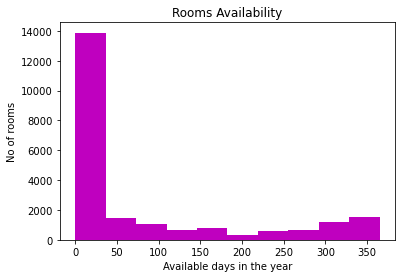

In [11]:
plt.title('Rooms Availability')
plt.xlabel('Available days in the year')
plt.ylabel('No of rooms')
plt.hist(listings.availability_365,color='m')

plt.show()

Scatter plot to show the relation between the price and the number of minimum nights

<AxesSubplot:xlabel='price', ylabel='minimum_nights'>

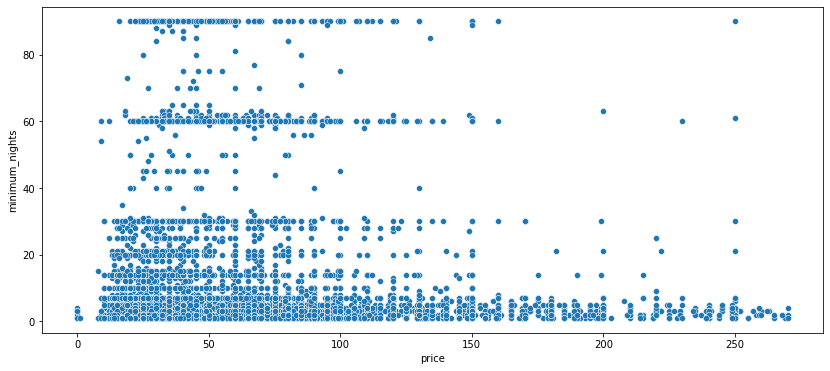

In [12]:
plt.figure(figsize=(14,6))

sns.scatterplot(x=listings['price'], y=listings['minimum_nights'])

In [ ]:
# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,BoxSelectTool
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
from bokeh.models import LinearColorMapper
output_notebook()

f = figure()
f.scatter(x=listings['price'],y=listings['minimum_nights'], alpha=0.7)
show(f)